In [1]:
# Set OMP_NUM_THREADS to 1 to avoid memory leak
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Import Warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from fcmeans import FCM

# Import CSV
df = pd.read_csv("Mall_Customers.csv")

# Get basic info about the dataset
df.info()

# View summary statistics for numerical columns
print(df.describe())

# Display CSV (Optional)
print(df.head())

# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for any missing or NaN values now
print(df.isnull().sum())

# Drop any rows or columns with missing values
df_clean = df.dropna()
df_clean = df.dropna(axis=1)

# Drop 'CustomerID' as it's not relevant for clustering
df_cleaned = df.drop('CustomerID', axis=1)

# Encode 'Gender' column (Male/Female)
label_encoder = LabelEncoder()
df_cleaned['Gender'] = label_encoder.fit_transform(df_cleaned['Gender'])

# Standardize 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'
scaler = StandardScaler()
df_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    df_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
)

# Display cleaned and standardized data (Optional)
print(df_cleaned.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000         

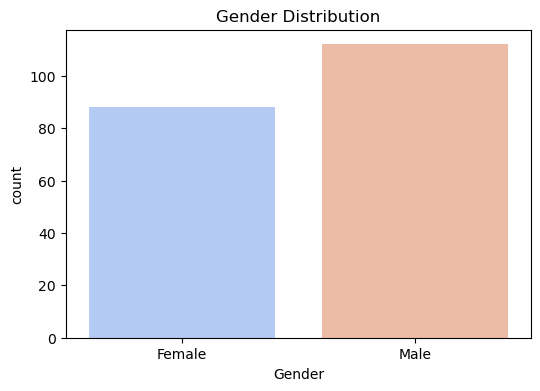

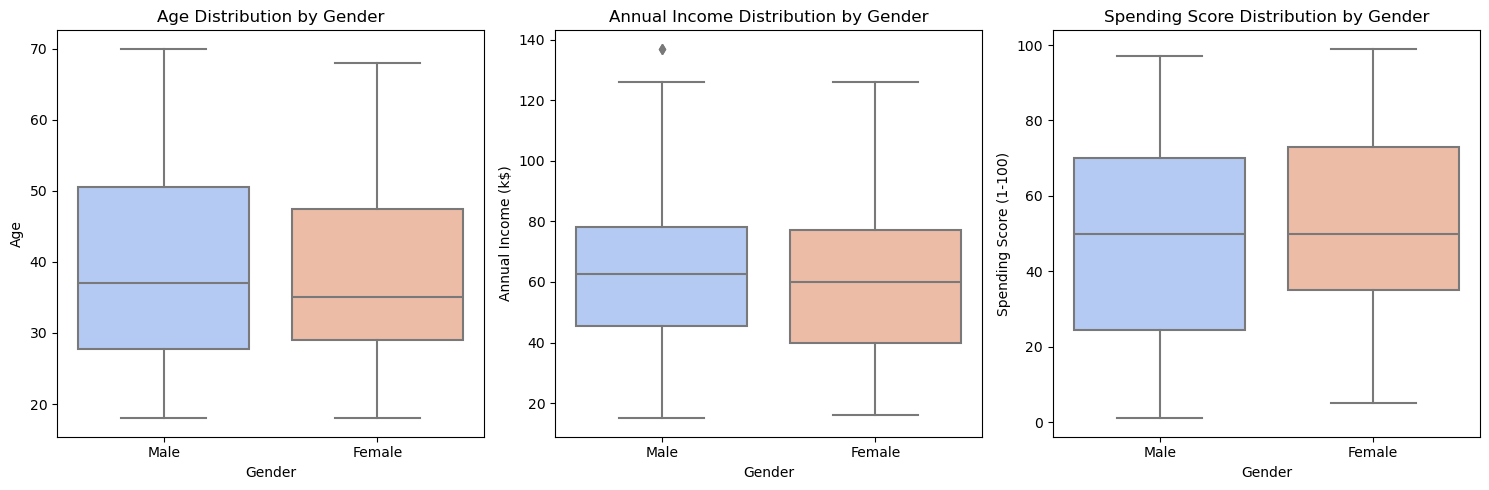

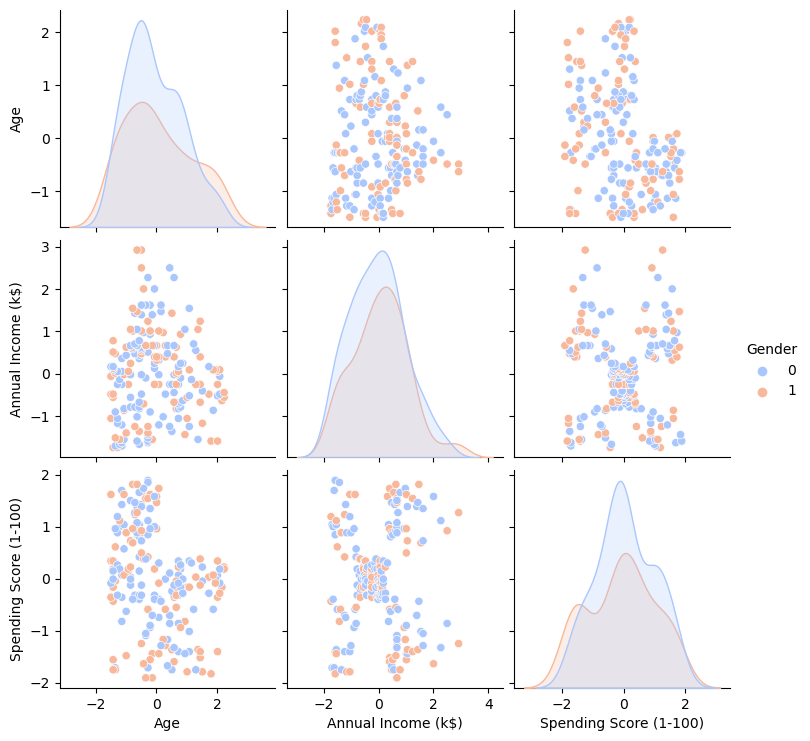

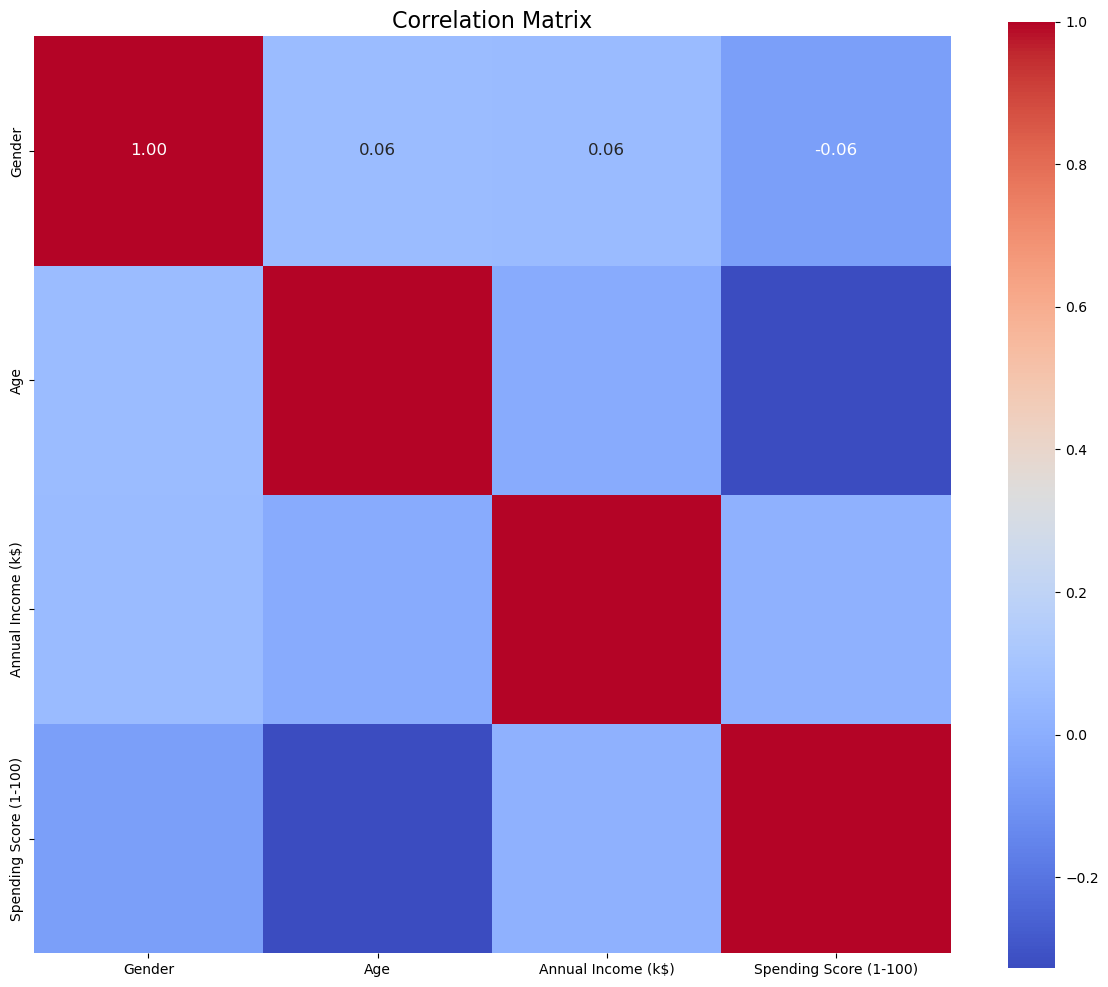

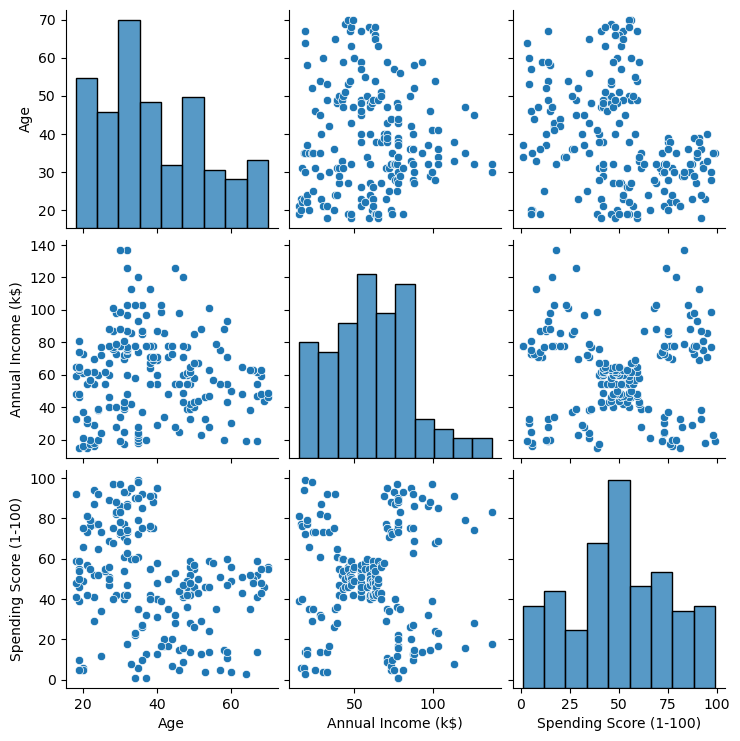

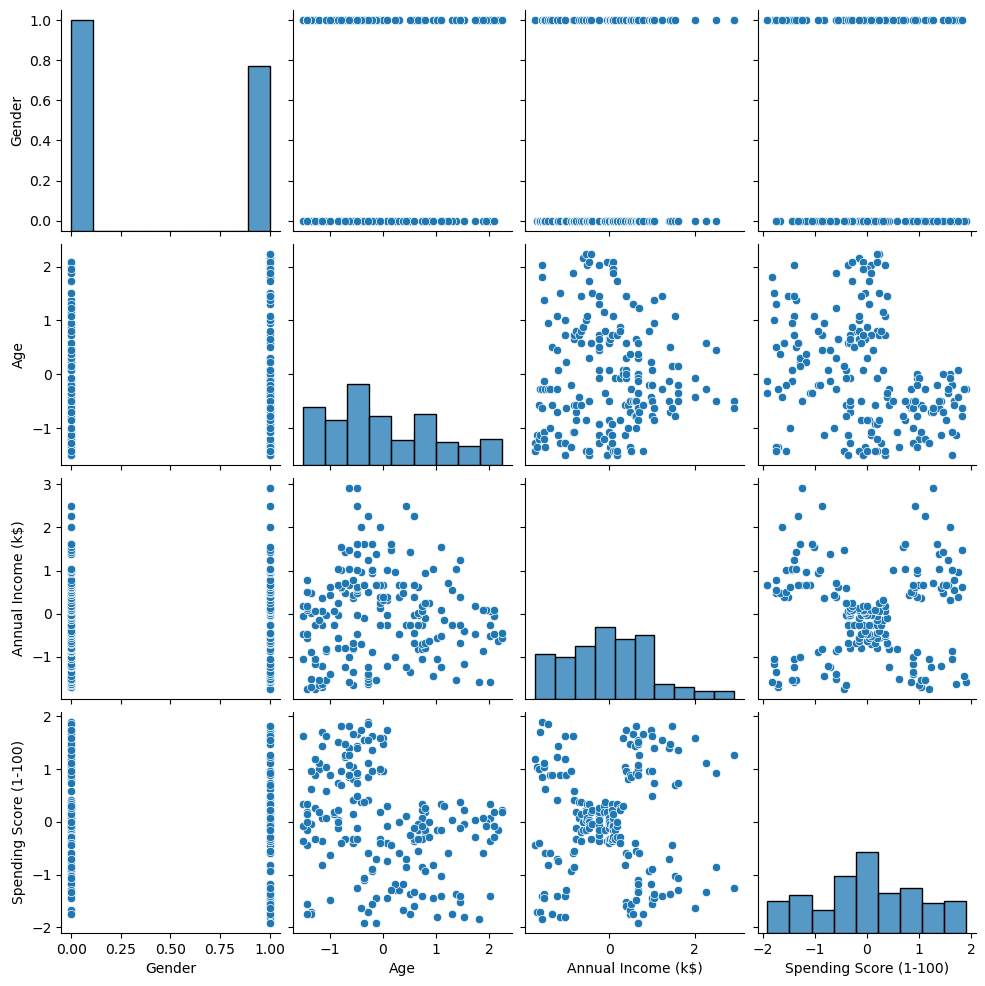

In [2]:
# Visualizations

# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# Boxplots for Age, Annual Income, and Spending Score across Genders
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='Age', data=df, palette='coolwarm')
plt.title('Age Distribution by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette='coolwarm')
plt.title('Annual Income Distribution by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='coolwarm')
plt.title('Spending Score Distribution by Gender')

plt.tight_layout()
plt.show()

# Pair plot for relationships between features colored by Gender
sns.pairplot(df_cleaned, hue='Gender', palette='coolwarm')
plt.show()

# Correlation Matrix
plt.figure(figsize=(12,10))  # Further increase the figure size to give more room for cells
correlation_matrix = df_cleaned.corr()

# Plot the heatmap with annotations and a larger font size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12}, square=True)  
plt.title('Correlation Matrix', fontsize=16)

# Ensure the layout is adjusted to prevent clipping
plt.tight_layout()

plt.show()

#Pairplots 
sns.pairplot(df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

sns.pairplot(df_cleaned[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

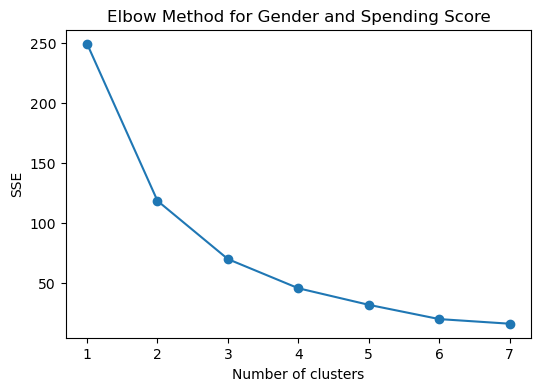

Silhouette Score for K-Means with 4 clusters: 0.5304


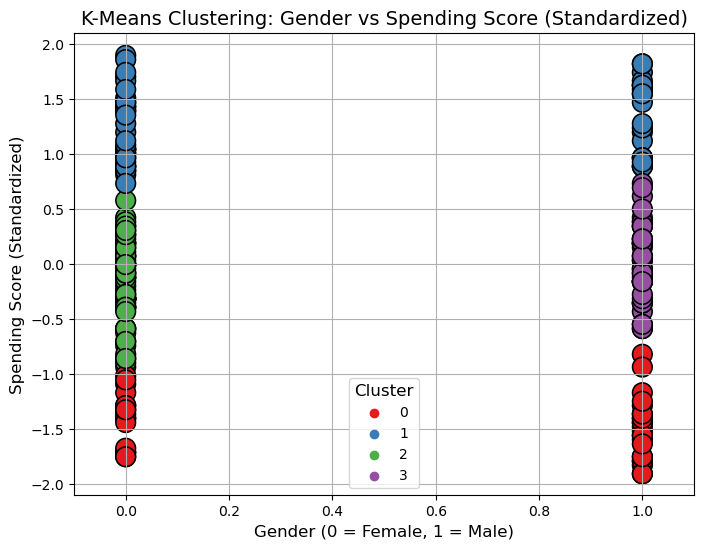

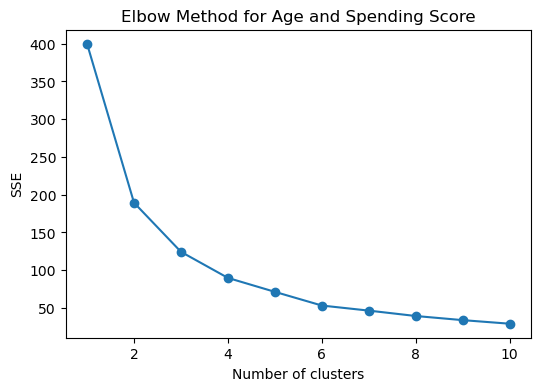

Silhouette Score for K-Means with 6 clusters: 0.4532


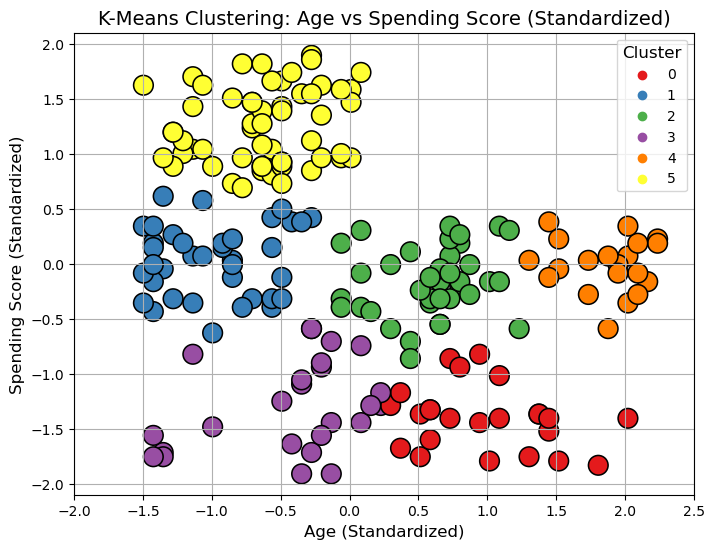

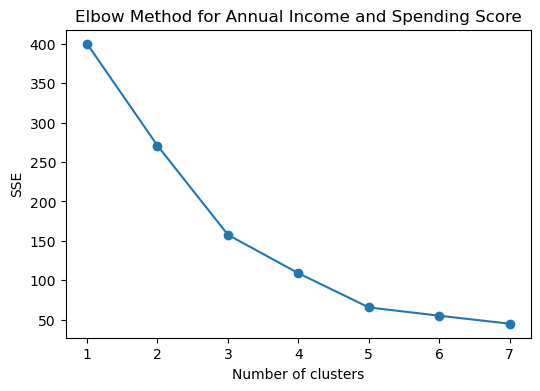

Silhouette Score for K-Means with 5 clusters: 0.5547


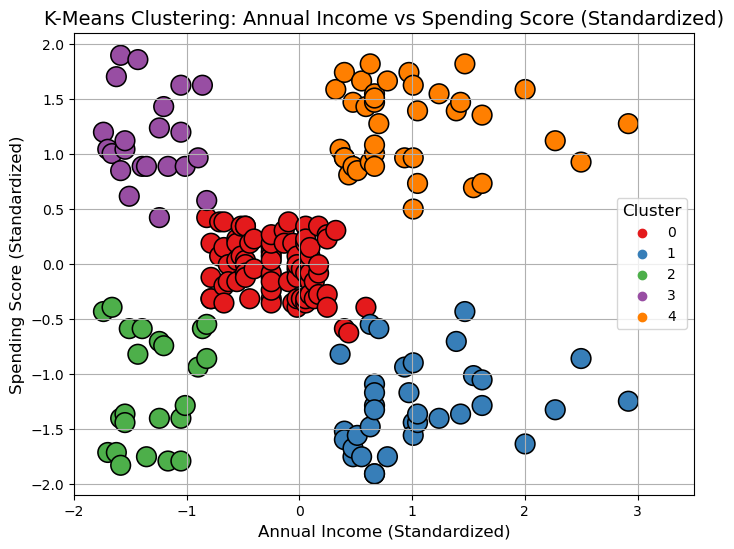

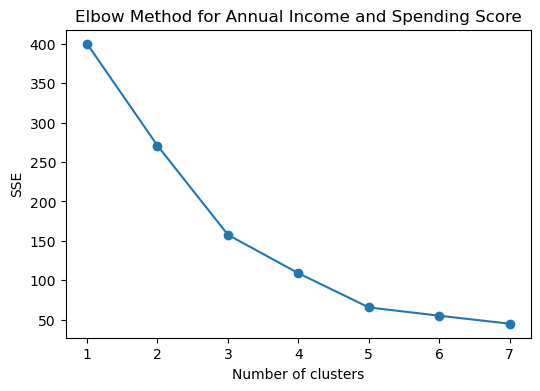

Silhouette Score for K-Means with 5 clusters: 0.5547


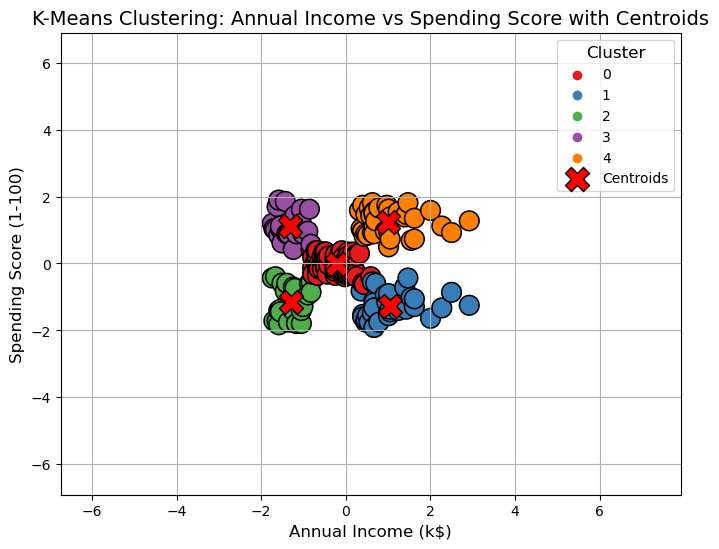

In [32]:
# Define X for Gender and Spending Score
X_gender_spending = df_cleaned[['Gender', 'Spending Score (1-100)']]

# Elbow Method for Gender and Spending Score
sse_gender = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_gender_spending)
    sse_gender.append(kmeans.inertia_)

# Plot the Elbow Method for Gender and Spending Score
plt.figure(figsize=(6, 4))
plt.plot(range(1, 8), sse_gender, marker='o')
plt.title('Elbow Method for Gender and Spending Score')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Apply K-Means for Gender and Spending Score
optimal_k_gender = 4 # Use the optimal number of clusters from the elbow method
kmeans_gender = KMeans(n_clusters=optimal_k_gender, random_state=42)
kmeans_labels_gender = kmeans_gender.fit_predict(X_gender_spending)

# Silhouette Score for K-Means with Annual Income and Spending Score
kmeans_silhouette_income = silhouette_score(X_gender_spending, kmeans_labels_gender)
print(f'Silhouette Score for K-Means with {optimal_k_gender} clusters: {kmeans_silhouette_income:.4f}')

# Scatter plot of clusters using Gender and Spending Score with better readability
plt.figure(figsize=(8, 6))

# Adjust the size of the points, axis limits, and use a different color palette for more contrast
sns.scatterplot(x=X_gender_spending['Gender'], 
                y=X_gender_spending['Spending Score (1-100)'], 
                hue=kmeans_labels_gender, 
                palette='Set1',  # You can try 'coolwarm', 'Set1', etc. for better contrast
                s=200,  # Increase point size for better visibility
                edgecolor='black')  # Add edge color to make points stand out

# Adjusting axis limits for readability
plt.xlim(-0.1, 1.1)  # Expanding the gender axis to prevent data points from being compressed
plt.ylim(-2.1, 2.1)  # Expand y-axis if needed for standardized values

# Add grid for better visual separation
plt.grid(True)

# Titles and axis labels
plt.title('K-Means Clustering: Gender vs Spending Score (Standardized)', fontsize=14)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Spending Score (Standardized)', fontsize=12)

# Legend
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)

# Display plot
plt.show()

# Define X for Age and Spending Score
X_age_spending = df_cleaned[['Age', 'Spending Score (1-100)']]

# Elbow Method for Age and Spending Score
sse_age = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_age_spending)
    sse_age.append(kmeans.inertia_)

# Plot the Elbow Method for Age and Spending Score
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse_age, marker='o')
plt.title('Elbow Method for Age and Spending Score')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Apply K-Means for Age and Spending Score
optimal_k_age = 6  # Use the optimal number of clusters from the elbow method
kmeans_age = KMeans(n_clusters=optimal_k_age, random_state=42)
kmeans_labels_age = kmeans_age.fit_predict(X_age_spending)

# Silhouette Score for K-Means with Annual Income and Spending Score
kmeans_silhouette_income = silhouette_score(X_age_spending, kmeans_labels_age)
print(f'Silhouette Score for K-Means with {optimal_k_age} clusters: {kmeans_silhouette_income:.4f}')

# Scatter plot of clusters using Age and Spending Score with better readability
plt.figure(figsize=(8, 6))

# Adjust the size of the points, axis limits, and color palette for better contrast
sns.scatterplot(x=X_age_spending['Age'], 
                y=X_age_spending['Spending Score (1-100)'], 
                hue=kmeans_labels_age, 
                palette='Set1',  # High contrast palette for better cluster visibility
                s=200,  # Larger points for better readability
                edgecolor='black')  # Edge color for point clarity

# Adjusting axis limits for better readability (if needed)
plt.xlim(-2, 2.5)  # Modify if you need more space around the data points
plt.ylim(-2.1, 2.1)  # Adjust y-axis if needed for better clarity

# Add grid for better visual separation
plt.grid(True)

# Titles and axis labels
plt.title('K-Means Clustering: Age vs Spending Score (Standardized)', fontsize=14)
plt.xlabel('Age (Standardized)', fontsize=12)
plt.ylabel('Spending Score (Standardized)', fontsize=12)

# Update legend for better readability
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)

# Display 
plt.show()

# Define the feature set for clustering (Annual Income and Spending Score)
X_income_spending = df_cleaned[['Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow Method for Annual Income and Spending Score
sse_income = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_income_spending)
    sse_income.append(kmeans.inertia_)

# Plot the Elbow Method for Annual Income and Spending Score
plt.figure(figsize=(6, 4))
plt.plot(range(1, 8), sse_income, marker='o')
plt.title('Elbow Method for Annual Income and Spending Score')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Apply K-Means for Annual Income and Spending Score
optimal_k_income = 5  # Use the optimal number of clusters from the elbow method
kmeans_income = KMeans(n_clusters=optimal_k_income, random_state=42)
kmeans_labels_income = kmeans_income.fit_predict(X_income_spending)

# Silhouette Score for K-Means with Annual Income and Spending Score
kmeans_silhouette_income = silhouette_score(X_income_spending, kmeans_labels_income)
print(f'Silhouette Score for K-Means with {optimal_k_income} clusters: {kmeans_silhouette_income:.4f}')

# Scatter plot of clusters using Annual Income and Spending Score with better readability
plt.figure(figsize=(8, 6))

# Adjust the size of the points, edge color, and color palette for more contrast
sns.scatterplot(x=X_income_spending['Annual Income (k$)'], 
                y=X_income_spending['Spending Score (1-100)'], 
                hue=kmeans_labels_income, 
                palette='Set1',  # High contrast palette for better cluster visibility
                s=200,  # Larger points for better readability
                edgecolor='black')  # Add edge color for clarity

# Optionally adjust axis limits for better spacing of points
plt.xlim(-2, 3.5)  # Adjust based on how much space is needed
plt.ylim(-2.1, 2.1)  # Adjust if needed

# Add grid for better visual separation
plt.grid(True)

# Titles and axis labels
plt.title('K-Means Clustering: Annual Income vs Spending Score (Standardized)', fontsize=14)
plt.xlabel('Annual Income (Standardized)', fontsize=12)
plt.ylabel('Spending Score (Standardized)', fontsize=12)

# Update legend for better readability
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)

# Display plot
plt.show()

# Define the feature set for clustering (Annual Income and Spending Score)
X_income_spending = df_cleaned[['Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow Method for Annual Income and Spending Score
sse_income = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_income_spending)
    sse_income.append(kmeans.inertia_)

# Plot the Elbow Method for Annual Income and Spending Score
plt.figure(figsize=(6, 4))
plt.plot(range(1, 8), sse_income, marker='o')
plt.title('Elbow Method for Annual Income and Spending Score')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Apply K-Means for Annual Income and Spending Score
optimal_k_income = 5  # Use the optimal number of clusters from the elbow method
kmeans_income = KMeans(n_clusters=optimal_k_income, random_state=42)
kmeans_labels_income = kmeans_income.fit_predict(X_income_spending)

# Extract centroids for the clusters
centroids_income = kmeans_income.cluster_centers_

# Silhouette Score for K-Means with Annual Income and Spending Score
kmeans_silhouette_income = silhouette_score(X_income_spending, kmeans_labels_income)
print(f'Silhouette Score for K-Means with {optimal_k_income} clusters: {kmeans_silhouette_income:.4f}')

# Scatter plot of clusters using Annual Income and Spending Score with centroids
plt.figure(figsize=(8, 6))

# Scatter plot for data points, colored by cluster
sns.scatterplot(x=X_income_spending['Annual Income (k$)'], 
                y=X_income_spending['Spending Score (1-100)'], 
                hue=kmeans_labels_income, 
                palette='Set1',  # High contrast palette for better cluster visibility
                s=200,  # Larger points for better readability
                edgecolor='black')  # Add edge color for clarity

# Plot centroids on the same scatter plot
plt.scatter(centroids_income[:, 0], centroids_income[:, 1], 
            s=300, c='red', marker='X', edgecolor='black', label='Centroids')

# Optionally adjust axis limits for better spacing of points
plt.xlim(X_income_spending['Annual Income (k$)'].min() - 5, X_income_spending['Annual Income (k$)'].max() + 5)
plt.ylim(X_income_spending['Spending Score (1-100)'].min() - 5, X_income_spending['Spending Score (1-100)'].max() + 5)

# Add grid for better visual separation
plt.grid(True)

# Titles and axis labels
plt.title('K-Means Clustering: Annual Income vs Spending Score with Centroids', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)

# Update legend for better readability
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)

# Display plot
plt.show()

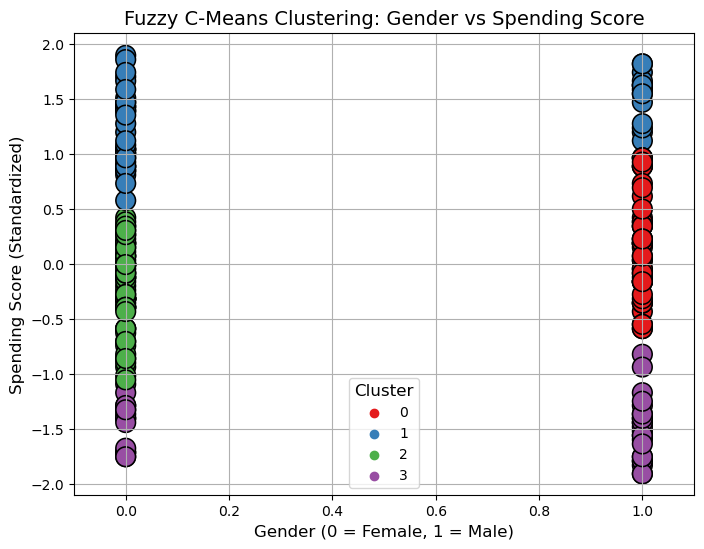

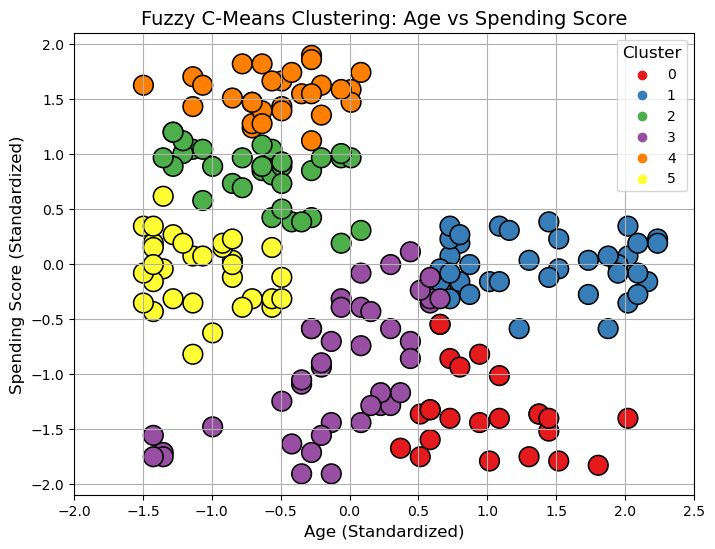

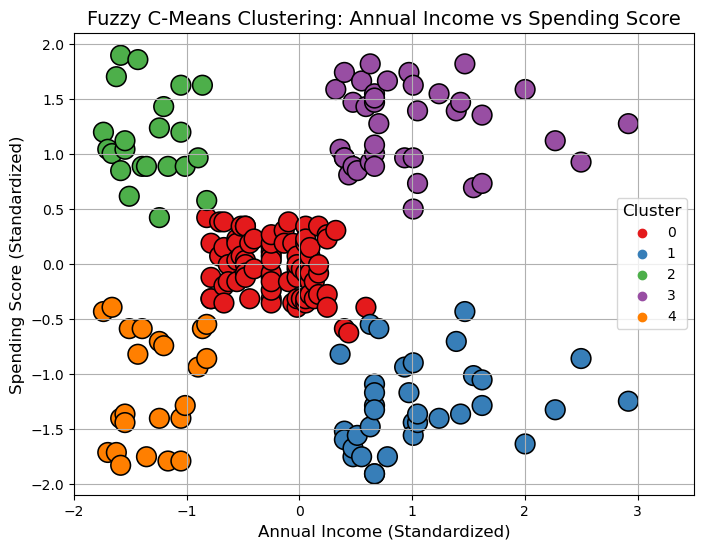

In [4]:
# Convert the DataFrame to a NumPy array for Fuzzy C-Means
X_gender_spending_array = X_gender_spending.values

# Apply Fuzzy C-Means for Gender and Spending Score
fcm = FCM(n_clusters=4)  # Use 4 clusters based on previous elbow method results
fcm.fit(X_gender_spending_array)

# Get Fuzzy C-Means labels
fuzzy_labels_gender = fcm.predict(X_gender_spending_array)

# Get the membership matrix (for probability of belonging to each cluster)
membership_matrix = fcm.u

# Scatter plot of Fuzzy C-Means clusters using Gender and Spending Score
plt.figure(figsize=(8, 6))

# Plot with Fuzzy C-Means labels
sns.scatterplot(x=X_gender_spending['Gender'], 
                y=X_gender_spending['Spending Score (1-100)'], 
                hue=fuzzy_labels_gender, 
                palette='Set1', 
                s=200, 
                edgecolor='black')

# Adjusting axis limits
plt.xlim(-0.1, 1.1)
plt.ylim(-2.1, 2.1)

# Add grid for better visual separation
plt.grid(True)

# Titles and axis labels
plt.title('Fuzzy C-Means Clustering: Gender vs Spending Score', fontsize=14)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Spending Score (Standardized)', fontsize=12)

# Legend
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)

# Display plot
plt.show()

# Similarly, for Age and Spending Score
X_age_spending_array = X_age_spending.values

# Apply Fuzzy C-Means for Age and Spending Score
fcm_age = FCM(n_clusters=6)
fcm_age.fit(X_age_spending_array)

# Get Fuzzy C-Means labels for Age and Spending Score
fuzzy_labels_age = fcm_age.predict(X_age_spending_array)

# Scatter plot of Fuzzy C-Means clusters using Age and Spending Score
plt.figure(figsize=(8, 6))

# Plot with Fuzzy C-Means labels
sns.scatterplot(x=X_age_spending['Age'], 
                y=X_age_spending['Spending Score (1-100)'], 
                hue=fuzzy_labels_age, 
                palette='Set1', 
                s=200, 
                edgecolor='black')

# Adjusting axis limits
plt.xlim(-2, 2.5)
plt.ylim(-2.1, 2.1)

# Add grid for better visual separation
plt.grid(True)

# Titles and axis labels
plt.title('Fuzzy C-Means Clustering: Age vs Spending Score', fontsize=14)
plt.xlabel('Age (Standardized)', fontsize=12)
plt.ylabel('Spending Score (Standardized)', fontsize=12)

# Update legend for better readability
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)

# Display plot
plt.show()

# Similarly, for Annual Income and Spending Score
X_income_spending_array = X_income_spending.values

# Apply Fuzzy C-Means for Annual Income and Spending Score
fcm_income = FCM(n_clusters=5)
fcm_income.fit(X_income_spending_array)

# Get Fuzzy C-Means labels for Annual Income and Spending Score
fuzzy_labels_income = fcm_income.predict(X_income_spending_array)

# Scatter plot of Fuzzy C-Means clusters using Annual Income and Spending Score
plt.figure(figsize=(8, 6))

# Plot with Fuzzy C-Means labels
sns.scatterplot(x=X_income_spending['Annual Income (k$)'], 
                y=X_income_spending['Spending Score (1-100)'], 
                hue=fuzzy_labels_income, 
                palette='Set1', 
                s=200, 
                edgecolor='black')

# Optionally adjust axis limits for better spacing of points
plt.xlim(-2, 3.5)  
plt.ylim(-2.1, 2.1)

# Add grid for better visual separation
plt.grid(True)

# Titles and axis labels
plt.title('Fuzzy C-Means Clustering: Annual Income vs Spending Score', fontsize=14)
plt.xlabel('Annual Income (Standardized)', fontsize=12)
plt.ylabel('Spending Score (Standardized)', fontsize=12)

# Update legend for better readability
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)

# Display plot
plt.show()

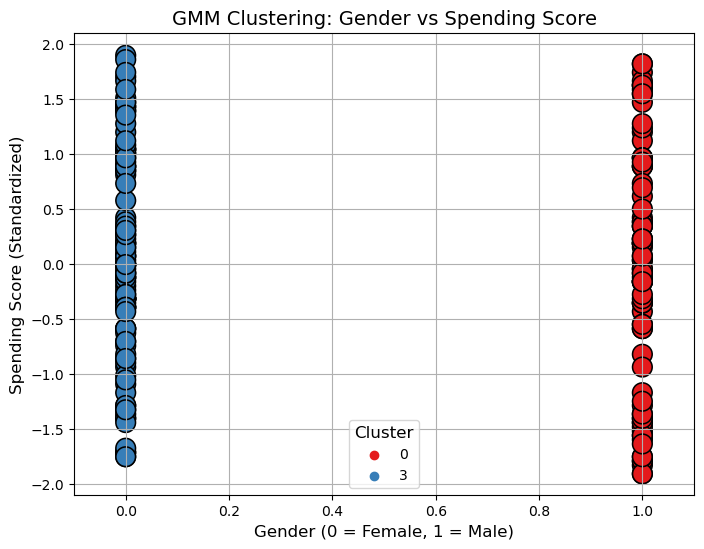

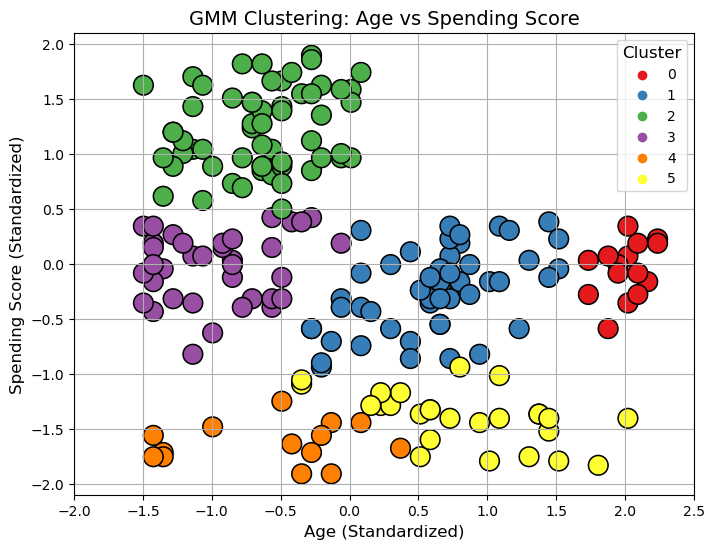

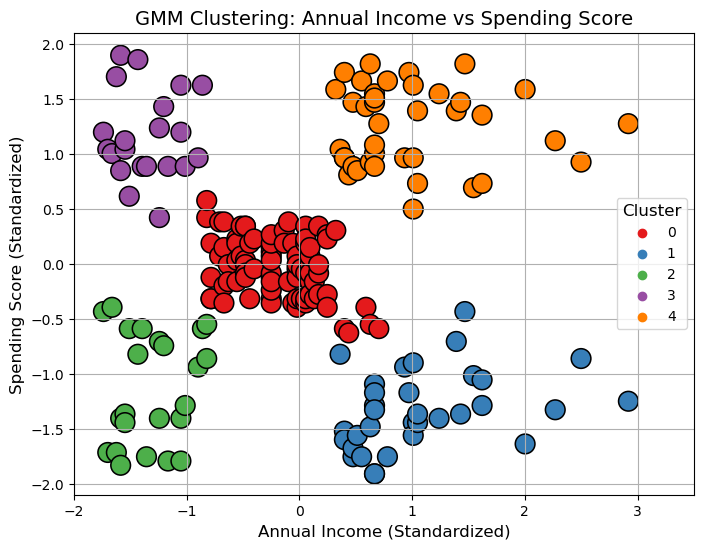

In [5]:
# Define X for Gender and Spending Score
X_gender_spending_array = X_gender_spending.values

# Apply Gaussian Mixture Models for Gender and Spending Score
gmm = GaussianMixture(n_components=4, random_state=42)  # 4 clusters based on elbow method
gmm.fit(X_gender_spending_array)

# Predict the cluster labels
gmm_labels_gender = gmm.predict(X_gender_spending_array)

# Scatter plot for GMM clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_gender_spending['Gender'], 
                y=X_gender_spending['Spending Score (1-100)'], 
                hue=gmm_labels_gender, 
                palette='Set1', 
                s=200, 
                edgecolor='black')

plt.xlim(-0.1, 1.1)
plt.ylim(-2.1, 2.1)
plt.grid(True)
plt.title('GMM Clustering: Gender vs Spending Score', fontsize=14)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Spending Score (Standardized)', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)
plt.show()

# Apply GMM for Age and Spending Score
X_age_spending_array = X_age_spending.values

gmm_age = GaussianMixture(n_components=6, random_state=42)
gmm_age.fit(X_age_spending_array)
gmm_labels_age = gmm_age.predict(X_age_spending_array)

# Scatter plot for GMM clustering for Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_age_spending['Age'], 
                y=X_age_spending['Spending Score (1-100)'], 
                hue=gmm_labels_age, 
                palette='Set1', 
                s=200, 
                edgecolor='black')

plt.xlim(-2, 2.5)
plt.ylim(-2.1, 2.1)
plt.grid(True)
plt.title('GMM Clustering: Age vs Spending Score', fontsize=14)
plt.xlabel('Age (Standardized)', fontsize=12)
plt.ylabel('Spending Score (Standardized)', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)
plt.show()

# Apply GMM for Annual Income and Spending Score
X_income_spending_array = X_income_spending.values

gmm_income = GaussianMixture(n_components=5, random_state=42)
gmm_income.fit(X_income_spending_array)
gmm_labels_income = gmm_income.predict(X_income_spending_array)

# Scatter plot for GMM clustering for Annual Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_income_spending['Annual Income (k$)'], 
                y=X_income_spending['Spending Score (1-100)'], 
                hue=gmm_labels_income, 
                palette='Set1', 
                s=200, 
                edgecolor='black')

plt.xlim(-2, 3.5)  
plt.ylim(-2.1, 2.1)
plt.grid(True)
plt.title('GMM Clustering: Annual Income vs Spending Score', fontsize=14)
plt.xlabel('Annual Income (Standardized)', fontsize=12)
plt.ylabel('Spending Score (Standardized)', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)
plt.show()

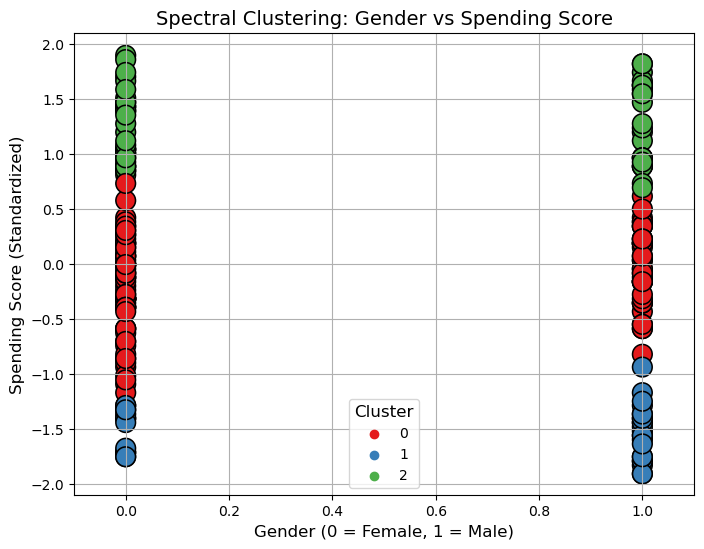

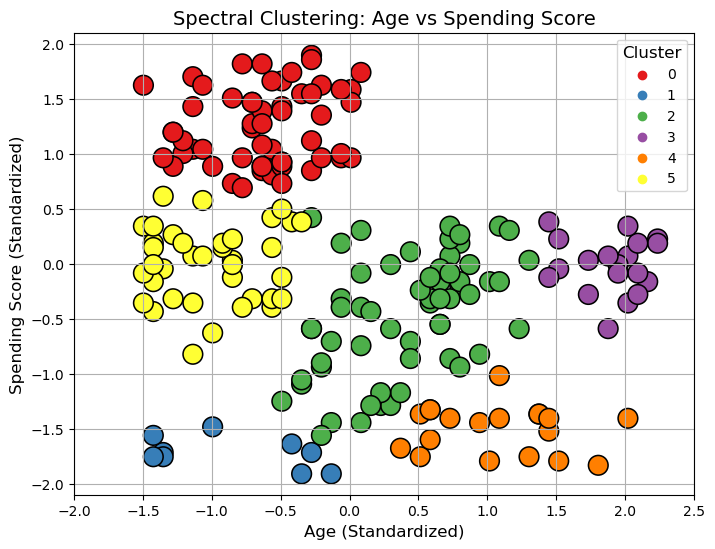

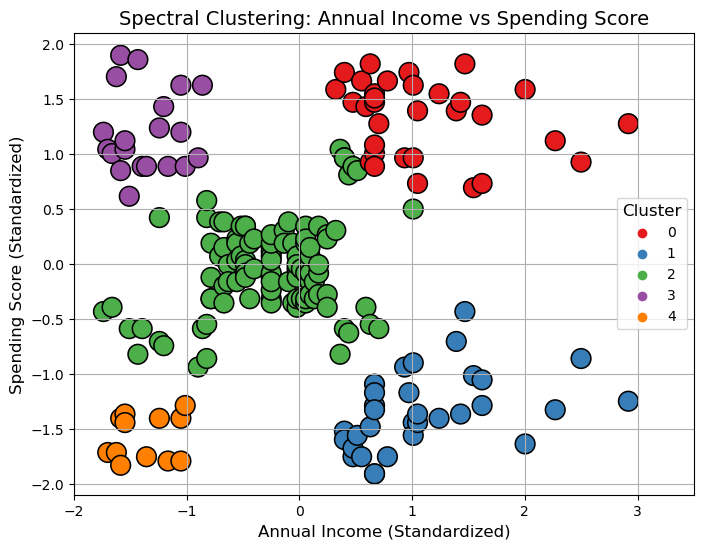

In [6]:
# Apply Spectral Clustering for Gender and Spending Score
spectral = SpectralClustering(n_clusters=3, affinity='rbf', random_state=42)
spectral_labels_gender_rbf = spectral.fit_predict(X_gender_spending_array)

# Scatter plot for Spectral Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_gender_spending['Gender'], 
                y=X_gender_spending['Spending Score (1-100)'], 
                hue=spectral_labels_gender_rbf, 
                palette='Set1', 
                s=200, 
                edgecolor='black')

plt.xlim(-0.1, 1.1)
plt.ylim(-2.1, 2.1)
plt.grid(True)
plt.title('Spectral Clustering: Gender vs Spending Score', fontsize=14)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Spending Score (Standardized)', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)
plt.show()

# Apply Spectral Clustering for Age and Spending Score
spectral_age = SpectralClustering(n_clusters=6, affinity='rbf', random_state=42)
spectral_labels_age_rbf = spectral_age.fit_predict(X_age_spending_array)

# Scatter plot for Spectral Clustering for Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_age_spending['Age'], 
                y=X_age_spending['Spending Score (1-100)'], 
                hue=spectral_labels_age_rbf, 
                palette='Set1', 
                s=200, 
                edgecolor='black')

plt.xlim(-2, 2.5)
plt.ylim(-2.1, 2.1)
plt.grid(True)
plt.title('Spectral Clustering: Age vs Spending Score', fontsize=14)
plt.xlabel('Age (Standardized)', fontsize=12)
plt.ylabel('Spending Score (Standardized)', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)
plt.show()

# Apply Spectral Clustering for Annual Income and Spending Score
spectral_income = SpectralClustering(n_clusters=5, affinity='rbf', random_state=42)
spectral_labels_income_rbf = spectral_income.fit_predict(X_income_spending_array)

# Scatter plot for Spectral Clustering for Annual Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_income_spending['Annual Income (k$)'], 
                y=X_income_spending['Spending Score (1-100)'], 
                hue=spectral_labels_income_rbf, 
                palette='Set1', 
                s=200, 
                edgecolor='black')

plt.xlim(-2, 3.5)  
plt.ylim(-2.1, 2.1)
plt.grid(True)
plt.title('Spectral Clustering: Annual Income vs Spending Score', fontsize=14)
plt.xlabel('Annual Income (Standardized)', fontsize=12)
plt.ylabel('Spending Score (Standardized)', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)
plt.show()

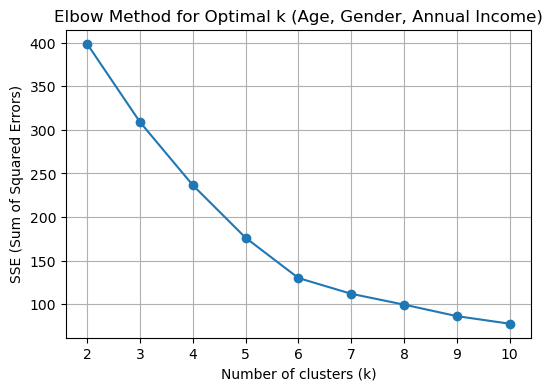

For n_clusters = 2, the average silhouette score is: 0.3626
For n_clusters = 3, the average silhouette score is: 0.3544
For n_clusters = 4, the average silhouette score is: 0.3508
For n_clusters = 5, the average silhouette score is: 0.3978
For n_clusters = 6, the average silhouette score is: 0.4279
For n_clusters = 7, the average silhouette score is: 0.4204
For n_clusters = 8, the average silhouette score is: 0.4249
For n_clusters = 9, the average silhouette score is: 0.4068
For n_clusters = 10, the average silhouette score is: 0.3996


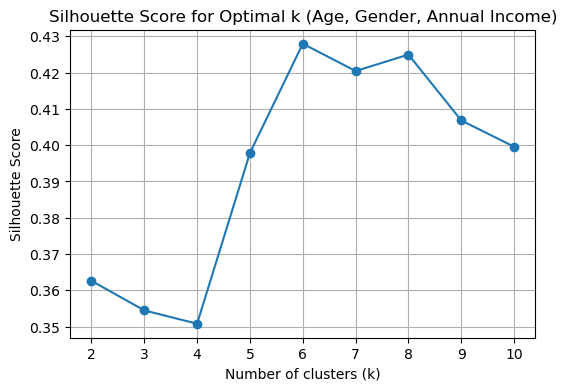

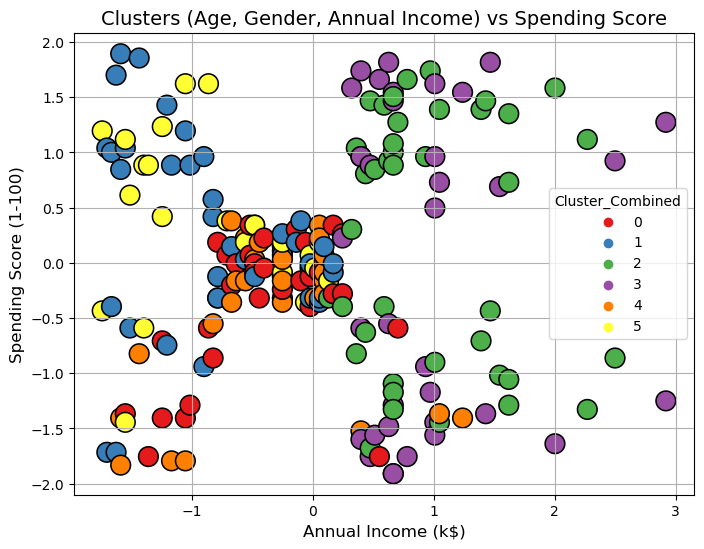

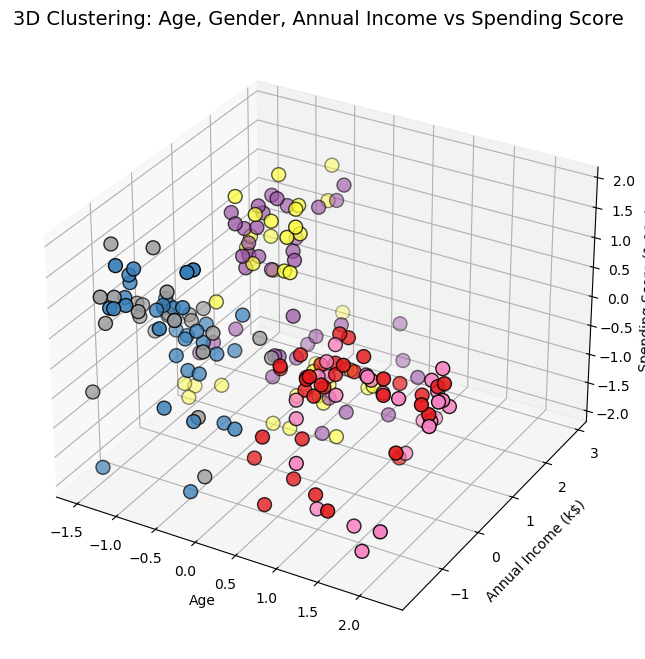

In [7]:
# Define X combining Age, Gender, and Annual Income (k$)
X_combined = df_cleaned[['Age', 'Gender', 'Annual Income (k$)']]

# Standardize the data for clustering
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

### Step 1: Elbow Method to determine the optimal number of clusters ###
sse = []  # List to store the sum of squared errors for each k
for k in range(2, 11):  # Testing k values from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_combined_scaled)
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the closest cluster center

# Plot the Elbow Method graph
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k (Age, Gender, Annual Income)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.grid(True)
plt.show()

### Step 2: Silhouette Score to evaluate the clustering quality ###
silhouette_scores = []
for k in range(2, 11):  # Testing k values from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_combined_scaled)
    silhouette_avg = silhouette_score(X_combined_scaled, kmeans_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'For n_clusters = {k}, the average silhouette score is: {silhouette_avg:.4f}')

# Plot the Silhouette Scores
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k (Age, Gender, Annual Income)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


# Define X combining Age, Gender, and Annual Income (k$)
X_combined = df_cleaned[['Age', 'Gender', 'Annual Income (k$)']]

# Standardize the data for clustering
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)  # Adjust 'n_clusters' based on your elbow method results
kmeans_labels_combined = kmeans.fit_predict(X_combined_scaled)

# Add the predicted cluster labels back to the dataframe
df_cleaned['Cluster_Combined'] = kmeans_labels_combined

# Scatter plot to compare clusters with Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                hue='Cluster_Combined', 
                data=df_cleaned, 
                palette='Set1', 
                s=200, 
                edgecolor='black')

# Titles and axis labels
plt.title('Clusters (Age, Gender, Annual Income) vs Spending Score', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)

# Display plot
plt.grid(True)
plt.show()

# Optional: 3D Scatter Plot for better visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot of Age, Gender, and Annual Income, colored by clusters
ax.scatter(df_cleaned['Age'], 
           df_cleaned['Annual Income (k$)'], 
           df_cleaned['Spending Score (1-100)'], 
           c=df_cleaned['Cluster_Combined'], 
           cmap='Set1', s=100, edgecolor='black')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Clustering: Age, Gender, Annual Income vs Spending Score', fontsize=14)
plt.show()


For Male, n_clusters = 2, the average silhouette score is: 0.3789
For Male, n_clusters = 3, the average silhouette score is: 0.4426
For Male, n_clusters = 4, the average silhouette score is: 0.4397
For Male, n_clusters = 5, the average silhouette score is: 0.4167
For Male, n_clusters = 6, the average silhouette score is: 0.3964
For Male, n_clusters = 7, the average silhouette score is: 0.4010
For Male, n_clusters = 8, the average silhouette score is: 0.4184
For Male, n_clusters = 9, the average silhouette score is: 0.4199
For Male, n_clusters = 10, the average silhouette score is: 0.3962


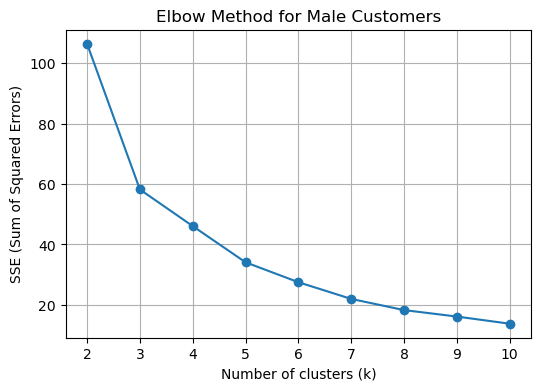

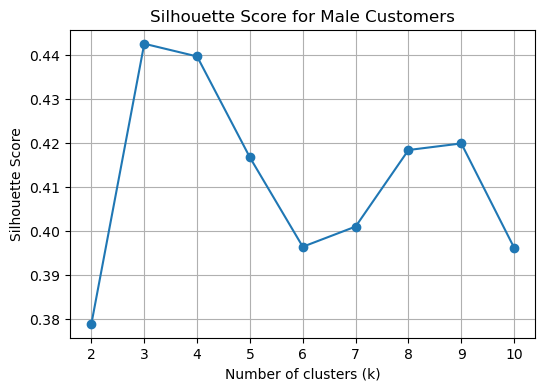

For Female, n_clusters = 2, the average silhouette score is: 0.3420
For Female, n_clusters = 3, the average silhouette score is: 0.4440
For Female, n_clusters = 4, the average silhouette score is: 0.4159
For Female, n_clusters = 5, the average silhouette score is: 0.3931
For Female, n_clusters = 6, the average silhouette score is: 0.4114
For Female, n_clusters = 7, the average silhouette score is: 0.3917
For Female, n_clusters = 8, the average silhouette score is: 0.4096
For Female, n_clusters = 9, the average silhouette score is: 0.4061
For Female, n_clusters = 10, the average silhouette score is: 0.4361


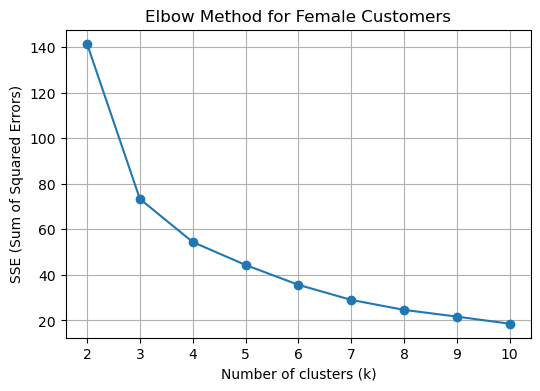

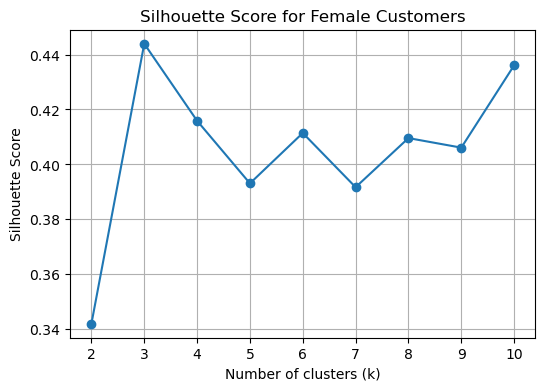

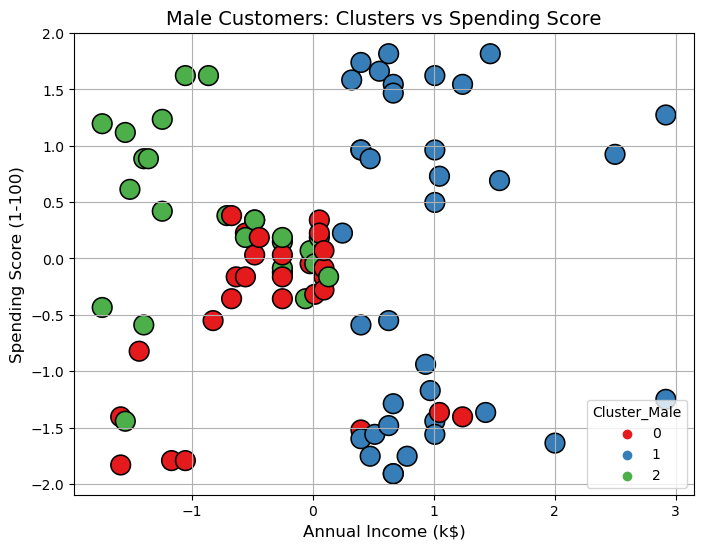

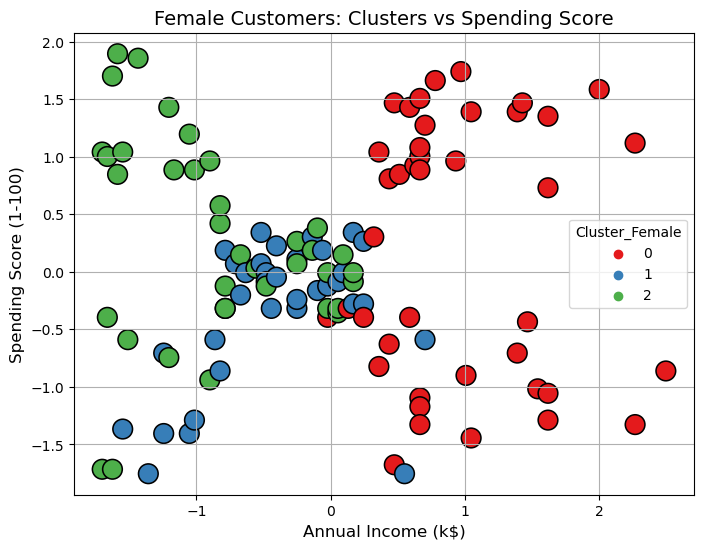

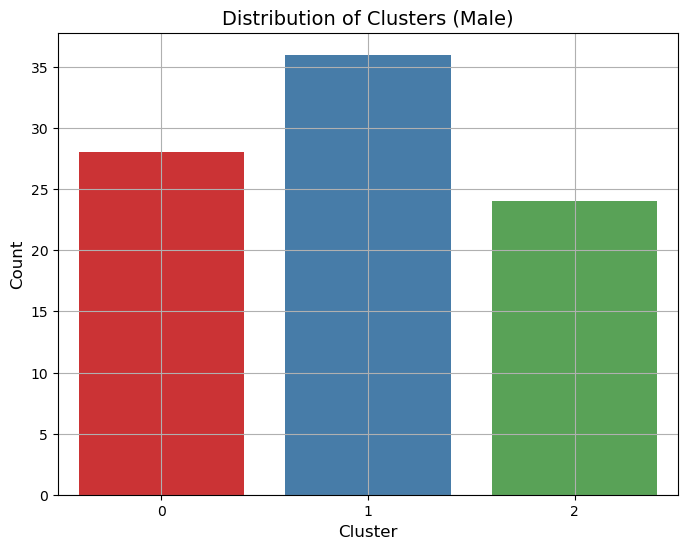

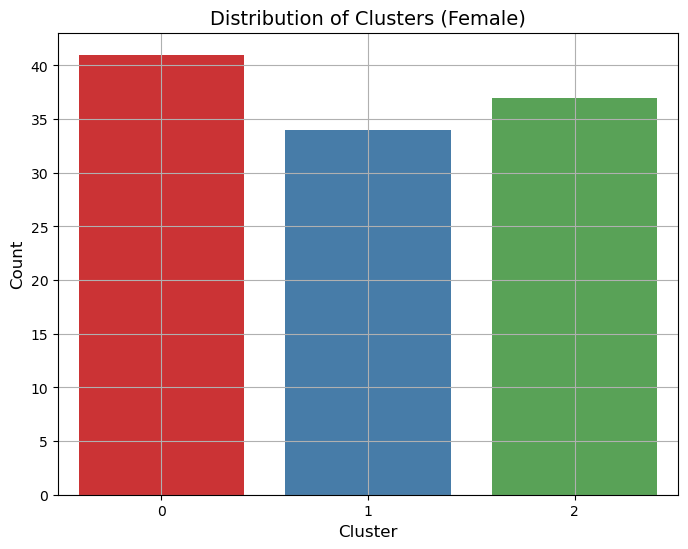

In [8]:
# Step 1: Separate Male and Female Customers (with .copy())
df_male = df_cleaned[df_cleaned['Gender'] == 1].copy()  # Male customers
df_female = df_cleaned[df_cleaned['Gender'] == 0].copy()  # Female customers

# Step 2: Define X for clustering (Age, Annual Income)
X_male = df_male[['Age', 'Annual Income (k$)']]
X_female = df_female[['Age', 'Annual Income (k$)']]

# Step 3: Standardize the data
scaler = StandardScaler()
X_male_scaled = scaler.fit_transform(X_male)
X_female_scaled = scaler.fit_transform(X_female)

### Elbow Method and Silhouette Score for Male Customers ###

# Elbow Method for Male customers
sse_male = []
silhouette_scores_male = []

for k in range(2, 11):  # Testing k values from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_male_scaled)
    sse_male.append(kmeans.inertia_)  # SSE (inertia)
    
    # Silhouette Score for Male
    kmeans_labels_male = kmeans.predict(X_male_scaled)
    silhouette_avg = silhouette_score(X_male_scaled, kmeans_labels_male)
    silhouette_scores_male.append(silhouette_avg)
    print(f'For Male, n_clusters = {k}, the average silhouette score is: {silhouette_avg:.4f}')

# Plot the Elbow Method for Male
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), sse_male, marker='o')
plt.title('Elbow Method for Male Customers')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.grid(True)
plt.show()

# Plot the Silhouette Scores for Male
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores_male, marker='o')
plt.title('Silhouette Score for Male Customers')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

### Elbow Method and Silhouette Score for Female Customers ###

# Elbow Method for Female customers
sse_female = []
silhouette_scores_female = []

for k in range(2, 11):  # Testing k values from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_female_scaled)
    sse_female.append(kmeans.inertia_)  # SSE (inertia)
    
    # Silhouette Score for Female
    kmeans_labels_female = kmeans.predict(X_female_scaled)
    silhouette_avg = silhouette_score(X_female_scaled, kmeans_labels_female)
    silhouette_scores_female.append(silhouette_avg)
    print(f'For Female, n_clusters = {k}, the average silhouette score is: {silhouette_avg:.4f}')

# Plot the Elbow Method for Female
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), sse_female, marker='o')
plt.title('Elbow Method for Female Customers')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.grid(True)
plt.show()

# Plot the Silhouette Scores for Female
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores_female, marker='o')
plt.title('Silhouette Score for Female Customers')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Step 4: Apply K-Means clustering for Male customers
kmeans_male = KMeans(n_clusters=3, random_state=42)
male_labels = kmeans_male.fit_predict(X_male_scaled)

# Apply K-Means clustering for Female customers
kmeans_female = KMeans(n_clusters=3, random_state=42)
female_labels = kmeans_female.fit_predict(X_female_scaled)

# Step 5: Add cluster labels back to the datasets
df_male.loc[:, 'Cluster_Male'] = male_labels
df_female.loc[:, 'Cluster_Female'] = female_labels

### Visualization for Male Customers ###
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                hue='Cluster_Male', 
                data=df_male, 
                palette='Set1', 
                s=200, 
                edgecolor='black')

plt.title('Male Customers: Clusters vs Spending Score', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(True)
plt.show()

### Visualization for Female Customers ###
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                hue='Cluster_Female', 
                data=df_female, 
                palette='Set1', 
                s=200, 
                edgecolor='black')

plt.title('Female Customers: Clusters vs Spending Score', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(True)
plt.show()

# Optional: Compare Cluster Distribution Between Male and Female
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster_Male', data=df_male, palette='Set1')
plt.title('Distribution of Clusters (Male)', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster_Female', data=df_female, palette='Set1')
plt.title('Distribution of Clusters (Female)', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.show()

In [9]:
# Extract cluster centroids for male and female clusters
male_centroids = scaler.inverse_transform(kmeans_male.cluster_centers_)  # Inverse transform to get back to original scale
female_centroids = scaler.inverse_transform(kmeans_female.cluster_centers_)

# Convert centroids to DataFrame for easier interpretation
male_centroids_df = pd.DataFrame(male_centroids, columns=['Age', 'Annual Income (k$)'])
female_centroids_df = pd.DataFrame(female_centroids, columns=['Age', 'Annual Income (k$)'])

# Display centroids for male and female customers
print("Male Customer Cluster Centroids:")
print(male_centroids_df)

print("\nFemale Customer Cluster Centroids:")
print(female_centroids_df)

Male Customer Cluster Centroids:
        Age  Annual Income (k$)
0  1.059535           -0.443655
1 -0.367972            0.826776
2 -0.881995           -0.905906

Female Customer Cluster Centroids:
        Age  Annual Income (k$)
0 -0.225540            0.961721
1  1.028163           -0.412050
2 -0.858194           -0.838407


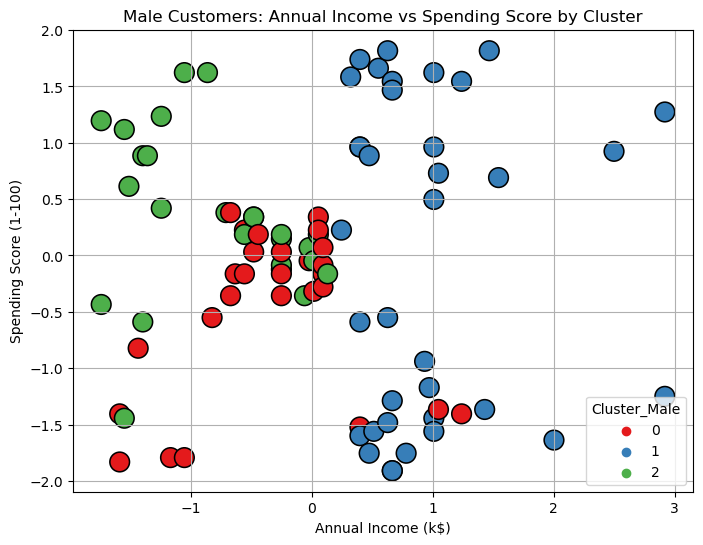

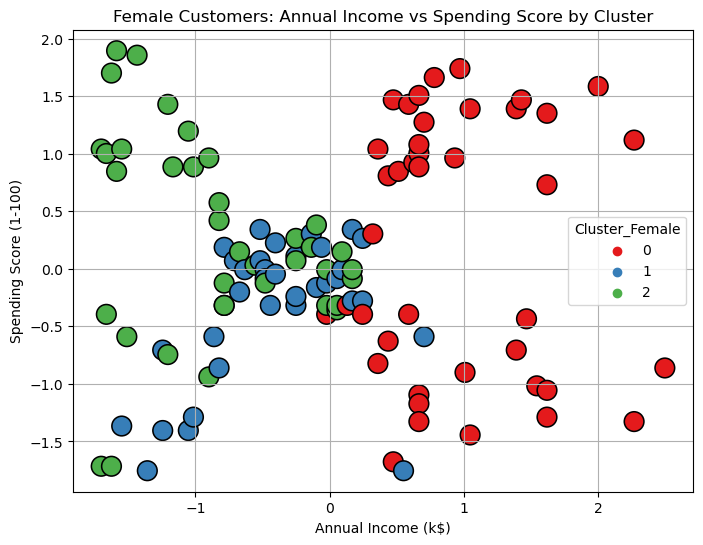

In [10]:
# Scatter plot for Male Customers: Annual Income vs Spending Score, colored by clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                hue='Cluster_Male', 
                data=df_male, 
                palette='Set1', 
                s=200, 
                edgecolor='black')
plt.title('Male Customers: Annual Income vs Spending Score by Cluster')
plt.grid(True)
plt.show()

# Scatter plot for Female Customers: Annual Income vs Spending Score, colored by clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                hue='Cluster_Female', 
                data=df_female, 
                palette='Set1', 
                s=200, 
                edgecolor='black')
plt.title('Female Customers: Annual Income vs Spending Score by Cluster')
plt.grid(True)
plt.show()

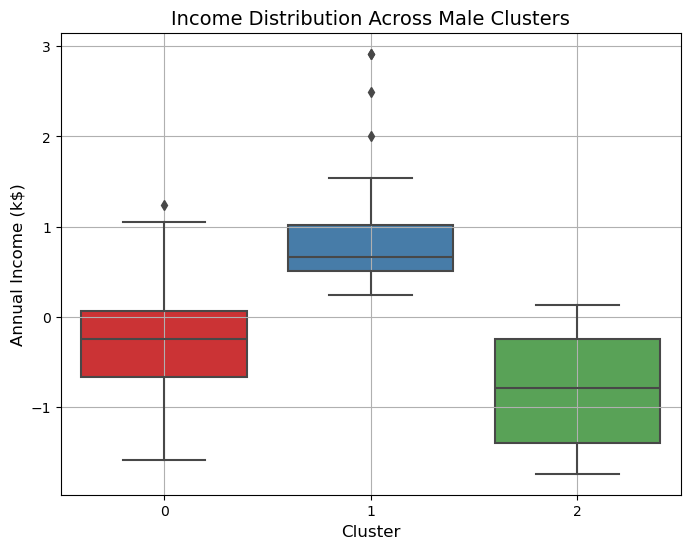

Income Statistics Across Male Clusters:
                  mean    median       std
Cluster_Male                              
0            -0.338999 -0.250391  0.678678
1             0.960428  0.665675  0.679472
2            -0.811800 -0.784763  0.641416


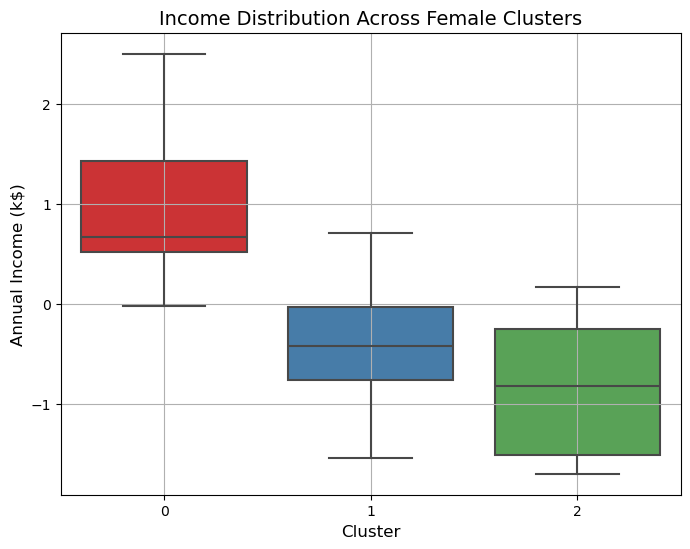

Income Statistics Across Female Clusters:
                    mean    median       std
Cluster_Female                              
0               0.961721  0.665675  0.620871
1              -0.412050 -0.422154  0.544930
2              -0.838407 -0.822933  0.640750


In [11]:
# Boxplot for income distribution across male clusters
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster_Male', y='Annual Income (k$)', data=df_male, palette='Set1')
plt.title('Income Distribution Across Male Clusters', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Annual Income (k$)', fontsize=12)
plt.grid(True)
plt.show()

# Summary statistics for income across male clusters
male_income_stats = df_male.groupby('Cluster_Male')['Annual Income (k$)'].agg(['mean', 'median', 'std'])
print("Income Statistics Across Male Clusters:")
print(male_income_stats)

# Boxplot for income distribution across female clusters
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster_Female', y='Annual Income (k$)', data=df_female, palette='Set1')
plt.title('Income Distribution Across Female Clusters', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Annual Income (k$)', fontsize=12)
plt.grid(True)
plt.show()

# Summary statistics for income across female clusters
female_income_stats = df_female.groupby('Cluster_Female')['Annual Income (k$)'].agg(['mean', 'median', 'std'])
print("Income Statistics Across Female Clusters:")
print(female_income_stats)

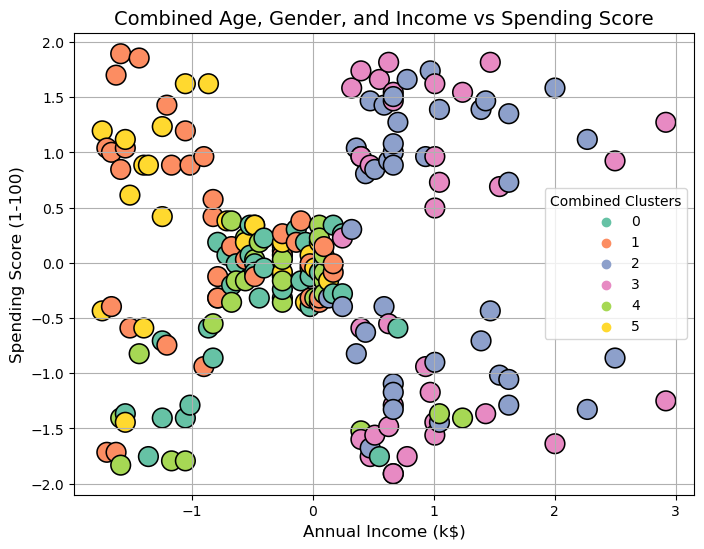

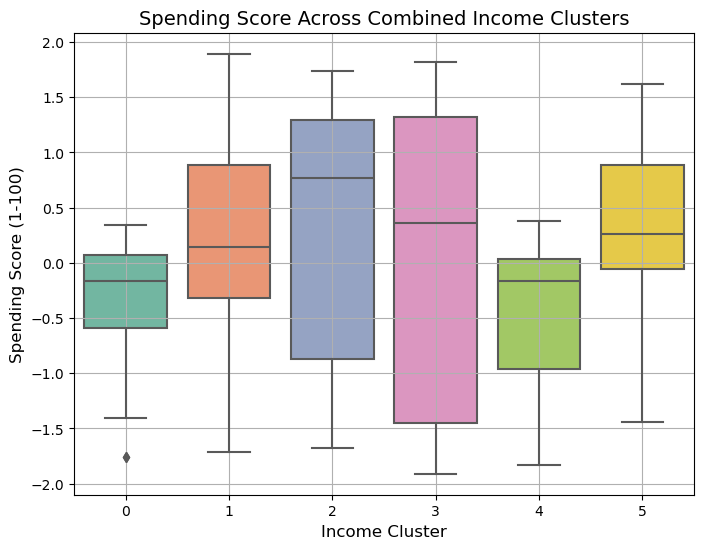

Spending Score Statistics Across Income Clusters:
                      mean    median       std
Cluster_Combined                              
0                -0.348285 -0.163051  0.607295
1                 0.239854  0.147522  0.863645
2                 0.227106  0.768667  1.129473
3                -0.023940  0.361041  1.390143
4                -0.472237 -0.163051  0.710550
5                 0.346482  0.263987  0.722423


In [12]:
# Scatter plot for Annual Income vs Spending Score for the whole dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=df_cleaned, 
                hue='Cluster_Combined',  # Color the points by cluster
                palette='Set2',  # Use a distinct palette for better color contrast between clusters
                s=200, 
                edgecolor='black')

plt.title('Combined Age, Gender, and Income vs Spending Score', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(True)
plt.legend(title='Combined Clusters', fontsize=10)
plt.show()

# Boxplot for Spending Score across Income Clusters
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster_Combined', 
            y='Spending Score (1-100)', 
            data=df_cleaned, 
            palette='Set2')  # Using the same palette for consistency

plt.title('Spending Score Across Combined Income Clusters', fontsize=14)
plt.xlabel('Income Cluster', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(True)
plt.show()


# Summary statistics for Spending Score by Income Cluster
income_spending_stats = df_cleaned.groupby('Cluster_Combined')['Spending Score (1-100)'].agg(['mean', 'median', 'std'])
print("Spending Score Statistics Across Income Clusters:")
print(income_spending_stats)

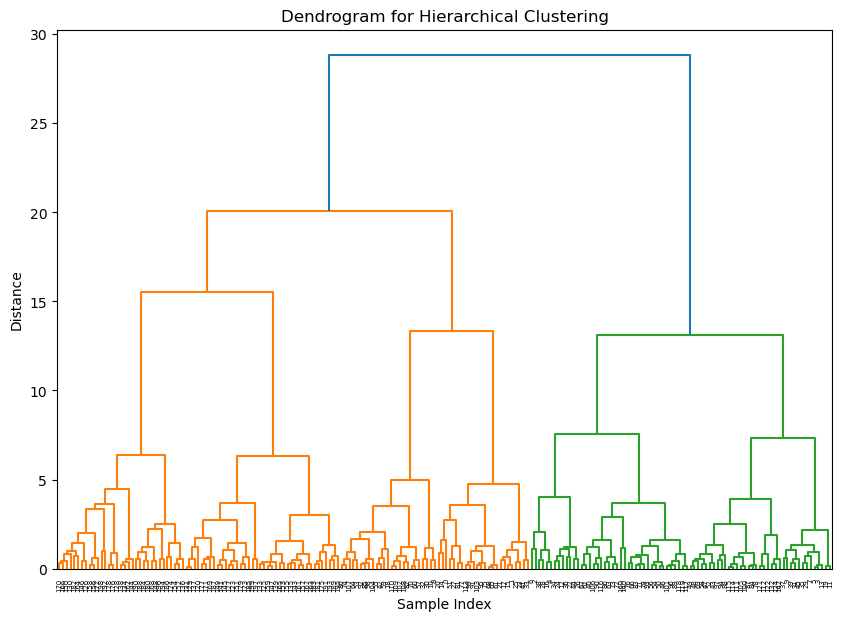

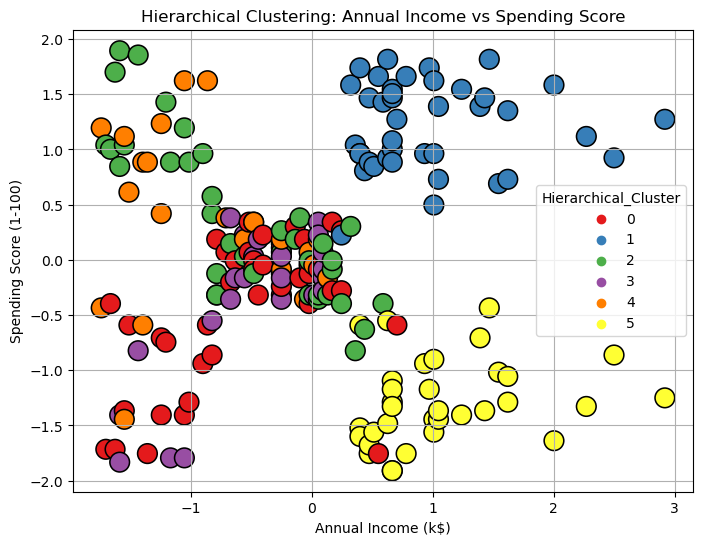

In [13]:
# Import libraries for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Step 1: Standardize the data if not already done
# This step assumes 'df_cleaned' is already standardized

# Step 2: Perform the linkage for hierarchical clustering (Ward's method)
linked = linkage(df_cleaned, method='ward')

# Step 3: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Step 4: Apply Agglomerative Clustering based on the dendrogram analysis
# Let’s assume we choose 4 clusters after reviewing the dendrogram
agg_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
hierarchical_labels = agg_cluster.fit_predict(df_cleaned)

# Step 5: Add the cluster labels back to the original dataset
df_cleaned['Hierarchical_Cluster'] = hierarchical_labels

# Step 6: Visualize the clusters based on 'Annual Income' and 'Spending Score'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', data=df_cleaned, palette='Set1', s=200, edgecolor='black')
plt.title('Hierarchical Clustering: Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


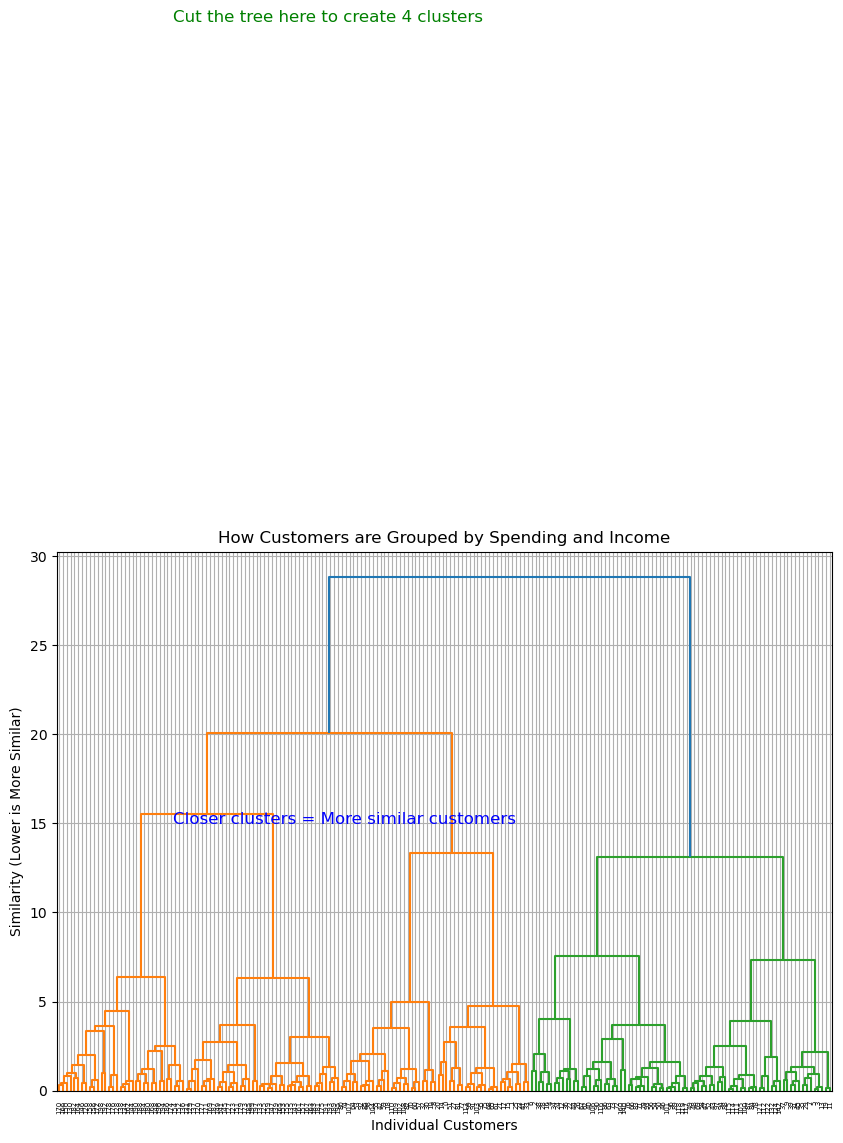

In [14]:
# Updated Dendrogram Plot for Readability

plt.figure(figsize=(10, 7))

# Plot the dendrogram
dendrogram(linked, 
           orientation='top',  # Top-down tree
           distance_sort='descending',  # Sort by descending distance
           show_leaf_counts=True)  # Show number of points in each cluster

# Add annotations to explain the dendrogram more clearly
plt.title('How Customers are Grouped by Spending and Income')
plt.xlabel('Individual Customers')
plt.ylabel('Similarity (Lower is More Similar)')

# Add explanation on plot
plt.text(300, 15, "Closer clusters = More similar customers", fontsize=12, color='blue')
plt.text(300, 60, "Cut the tree here to create 4 clusters", fontsize=12, color='green')
plt.axhline(y=60, color='green', linestyle='--')  # Example cut for forming 4 clusters

plt.grid(True)
plt.show()